# Protocolo Básico para a Aplicação das Técnicas de Machine Learning em Economia

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Protocolo básico para a aplicação de técnicas de Machine Learning em Economia

### Referências

* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, 2019.
* Athey, S., & Imbens, G. (2017). "The State of Applied Econometrics: Causality and Policy Evaluation." *Journal of Economic Perspectives*.
* Mullainathan, S., & Spiess, J. (2017). "Machine Learning: An Applied Econometric Approach." *Journal of Economic Perspectives*.
* Varian, H. R. (2014). "Big Data: New Tricks for Econometrics." *Journal of Economic Perspectives*.

## Protocolo básico para a aplicação de técnicas de Machine Learning em Economia

Supondo que já temos nossa base de dados (dataframe) pronta para ser utilizada, isto é, todas as variáveis estão no formato adequado e não há valores faltantes, temos em mente as relações entre as variáveis e o problema que queremos resolver, podemos seguir o protocolo básico para a aplicação de técnicas de Machine Learning em Economia.

* **1. Dividir a base de dados em treino e teste**
* **2. Selecionar o modelo**
* **3. Treinar o modelo**
* **4. Avaliar o modelo**
* **5. Ajustar o modelo**
* **6. Fazer previsões**
 
### 1. Dividir a base de dados em treino e teste

**Por que dividir a base de dados em treino e teste?**

A **divisão da base de dados** é uma etapa essencial para garantir que o modelo tenha um desempenho confiável e generalizável. Existem diferentes formas de realizar essa divisão, dependendo do contexto e do objetivo do estudo:

* **Divisão Simples (Hold-Out)**
  * Descrição: A base de dados é dividida em duas partes: treino e teste. Geralmente, usa-se uma proporção de 70-80% para treino e 20-30% para teste.
    * Vantages: É simples e rápido de implementar.
    * Desvantagens: Pode gerar resultados instáveis, dependendo da aleatoriedade da divisão.
* **Validação Cruzada (Cross-Validation)**
  * Descrição: Divide a base em múltiplos "folds". O modelo é treinado em $k-1$ folds e testado no fold restante, repetindo o processo $k$ vezes.
    * Vantages: Fornece uma estimativa mais estável do desempenho do modelo.
    * Desvantagens: Pode ser computacionalmente mais custoso.
* **Validação Cruzada Leave-One-Out**
  * Descrição: Cada observação é usada como conjunto de teste uma vez, enquanto as demais são usadas para treino.
    * Vantages: Fornece uma estimativa mais precisa do desempenho do modelo.
    * Desvantagens: Pode ser computacionalmente custoso para bases de dados grandes.

A divisão simples (hold-out) é mais comum na prática profissional, devido à sua simplicidade e rapidez de implementação.

Já na prática acadêmica, recomenda-se a utilização da **validação cruzada**, em especial a validação cruzada com **10 folds**, para avaliar o desempenho do modelo. Porque a validação cruzada com 10 folds oferece um bom **equilíbrio entre viés (erros sistemáticos) e variância (sensibilidade a diferentes divisões dos dados)**, é eficiente computacionalmente e é adotada na literatura. Além disso, com 10 folds, a base é dividida em partes suficientes para garantir uma avaliação confiável, mas sem aumentar excessivamente o custo computacional, como acontece com Leave-One-Out. Obsevação, com bases grandes, 5 folds podem ser suficientes. Já com bases pequenas, pode-se utilizar 20 folds.


### 2. Selecionar o modelo

**Por que é importante escolher o modelo adequado?**

A escolha do modelo é uma etapa crucial no protocolo de Machine Learning, pois influencia diretamente a capacidade do modelo de capturar as relações entre as variáveis e resolver o problema proposto. Em Economia, a escolha deve considerar tanto o tipo de problema quanto a necessidade de interpretabilidade, recursos computacionais disponíveis e a robustez dos resultados.

**Como selecionar o modelo?** 

A escolha do modelo pode ser guiada por diversos fatores:

* **Tipo de Problema**
  * **Regressão**: Prever um valor contínuo.
    * Regressão Linear
    * Árvores de Decisão e Random Forest
    * Gradient Boosting (XGBoost, LightGBM)
    * Redes Neurais para dados complexos
  * **Classificação**: Prever uma classe ou categoria.
    * Regressão Logística
    * Support Vector Machines (SVM)
    * Árvores de Decisão e Random Forest e Gradient Boosting
    * Redes Neurais para classificações complexas
  * **Agrupamento (Clustering)**: Identificar padrões e grupos nos dados. Identificação de grupos em dados não rotulados (e.g., segmentação de consumidores).
    * K-Means
    * DBSCAN
    * Hierarchical Clustering

* **Interpretabilidade**
  * Modelos simples e interpretáveis:
    * Regressão Linear e Logística.
    * Árvores de Decisão.
  * Modelos complexos e menos interpretáveis:
    * Random Forest, Gradient Boosting.
    * Redes Neurais.

No dia a dia, a maior parte dos problemas são de **regressão** ou **classificação**. Grosso modo, a **Regressão** é utilizada quando queremos prever um valor contínuo de Y (e.g., preço de um imóvel), enquanto a **Classificação** é utilizada quando queremos prever uma classe ou categoria de Y (e.g., aprovação de crédito). 

### 3. Treinar o modelo

**O que significa treinar um modelo?**

Treinar um modelo significa ajustar seus parâmetros internos com base nos dados de treino, a fim de minimizar uma função de erro ou maximizar o desempenho em relação ao objetivo específico (e.g., minimizar o erro quadrático médio em um problema de regressão). Durante o treinamento, o modelo "aprende" padrões e relações entre as variáveis preditoras ($X$) e a variável dependente ($y$).

Etapas no treinamento do modelo
* Preparar os dados para o treinamento
* Selecionar o modelo que será treinado com os dados
* Ajustar o modelo aos dados de treino

#### 4. Avaliar o modelo

**Por que avaliar o modelo?**

A avaliação do modelo é uma etapa essencial para verificar sua capacidade de generalização, ou seja, o desempenho em dados que não foram usados no treinamento. O objetivo é identificar se o modelo está apto a capturar padrões relevantes ou se está apresentando problemas como overfitting (ajuste excessivo) ou underfitting (subajuste).

**Quais as métricas de avaliação?**

A escolha da métrica depende do tipo de problema:

* **Problemas de Regressão:**

  * Erro Médio Absoluto (MAE): Mede o erro absoluto médio entre as previsões e os valores reais.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

  * Erro Quadrático Médio (MSE): Mede o erro quadrático médio entre as previsões e os valores reais.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  * Raiz do Erro Quadrático Médio (RMSE): Mede a raiz quadrada do erro quadrático médio.

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

  * R quadrado ($R^2$): Mede a proporção da variabilidade da variável dependente que é explicada pelo modelo.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


* **Problemas de classificação:**

  * Acurácia: Proporção de previsões corretas.

$$ Acurácia = \frac{Nº de previsões corretas}{Total de amostras} $$

  * Precisão, Recall e F1-Score:
    * Precisão: Proporção de verdadeiros positivos entre os previstos como positivos.
    * Recall: Proporção de verdadeiros positivos entre todos os positivos reais.
    * F1-Score: Média harmônica entre precisão e recall.
   * Curva ROC e AUC: Mede a capacidade do modelo de distinguir entre classes.

Sendo assim, vamos fazer o procedimento de validação cruzada com 10 folds para selecionar o modelo que melhor se ajusta aos nossos dados.



Vamos aplicar um exemplo de previsão para dados do Banco Central do Brasil.

Antes, você deve instalar a biblioteca de python para o BaCen. Ela serve para baixar os dados diretamente do site do Banco Central do Brasil. Vá ao terminal e digite: `pip install python-bcb`

O pacote bcb com o submódulo sgs é uma biblioteca Python que permite acessar séries temporais econômicas disponibilizadas pelo Banco Central do Brasil. Ele utiliza o Serviço Gerenciador de Séries Temporais (SGS) do Banco Central para acessar dados de diversas variáveis econômicas. Por exemplo:

1. Inflação e Índices de Preços
* IPCA (Código 433): Índice de Preços ao Consumidor Amplo, principal medida de inflação no Brasil.
* INPC (Código 188): Índice Nacional de Preços ao Consumidor.
* IGP-M (Código 189): Índice Geral de Preços do Mercado.
* IPCA-15 (Código 13522): Índice de Preços ao Consumidor Amplo - 15 dias.

2. Agregados Monetários
* M1 (Código 1781): Meio circulante, que inclui papel-moeda e depósitos à vista.
* M2 (Código 1782): Inclui M1 mais depósitos de poupança e depósitos a prazo.
* M3 (Código 1783): M2 mais quotas de fundos de renda fixa.
* M4 (Código 2784): M3 mais títulos públicos e privados de médio e longo prazo.

3. Taxas de Câmbio
* Taxa de Câmbio Nominal - Dólar (Código 1): Taxa de venda do dólar.
* Taxa de Câmbio Efetiva Real (Código 10813): Taxa ponderada com base no comércio exterior.

4. Taxas de Juros
* Selic Over (Código 432): Taxa básica de juros do Brasil.
* Taxa DI (Código 12): Taxa de Depósito Interbancário.
* Taxas de Juros para Títulos Públicos (Código 11): LTN e outros.

5. Atividade Econômica
* IBC-Br (Código 24364): Índice de Atividade Econômica do Banco Central, uma proxy para o PIB.
* Produção Industrial (Código 10784): Dados da produção industrial.

6. Crédito
* Saldo das Operações de Crédito (Código 21084): Total de operações de crédito no sistema financeiro.
* Inadimplência (Código 20786): Taxa de inadimplência para crédito de pessoa física.

7. Setor Externo
* Exportações FOB (Código 226): Valor das exportações brasileiras.
* Importações FOB (Código 227): Valor das importações brasileiras.

8. Dívida e Política Fiscal
* Dívida Bruta do Governo (Código 4509): Indicador de endividamento público.
* Superávit Primário (Código 3666): Indicador das contas públicas.


### Exercício

Vamos identificar o melhor modelo de previsão de inflação (IPCA) a partir de dados do Banco Central do Brasil. A ideia é contruir o modelo e verificar qual a projeção da inflação depois das eleições de 2022 (outubro de 2022), contra a inflação real até outubro de 2024.

Nossa variável alvo é o IPCA (Código 433), que é o índice oficial de inflação no Brasil. Nossas variáveis preditoras (features) serão:
* Taxa Selic (Código 432)
* IBC-Br (Código 24364)

Código 21776


In [1]:
from bcb import sgs
import pandas as pd

A ideia é baixar a série histórica do IPCA (Índice de Preços ao Consumidor Amplo) de 2003 a 2022 para treinar, e de 2022 à 2024 para prever.

In [2]:
# Código do IPCA é 433
df = sgs.get(['433', '432', '24364', '4509'], start='2003-01-01', end='2024-09-01')

Duas variáveis são de coleta mensal, então vamos manter apenas os dados para o primeiro dia do mês.

In [3]:
# renomear a coluna '433' por 'IPCA'
df = df.rename(columns={'433': 'IPCA_monthly'})
df = df.rename(columns={'432': 'Selic'})
df = df.rename(columns={'24364': 'IBC_Br'})

# Transformar o índice em uma coluna
df = df.reset_index()

# Criar as colunas 'month' e 'year'
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_1'] = df['Date'].dt.is_month_start
# manter apenas os dias 1
df = df[df['day_1']]

Precisamos calcular a inflação acumulada mensalmente para treinar o modelo. A inflação acumulada é calculada pela fórmula:

In [4]:
# Calcular o IPCA acumulado
df['IPCA_acum'] = (1 + df['IPCA_monthly'] / 100).cumprod() - 1
df['IPCA_acum'] = df['IPCA_acum'] * 100  # Converter para percentual

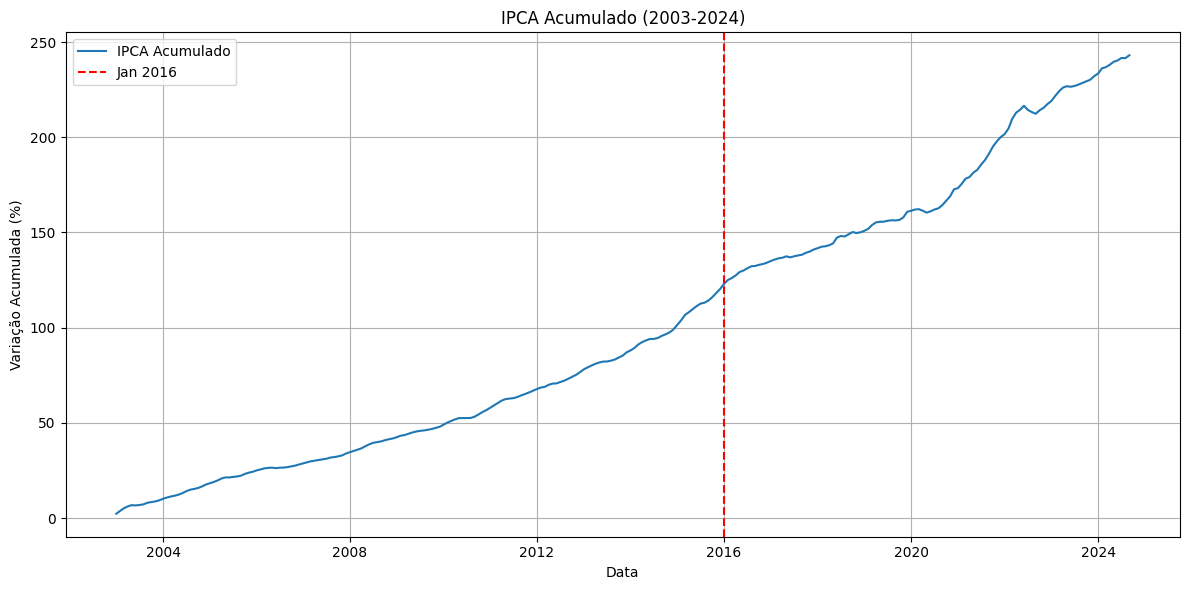

In [5]:
import matplotlib.pyplot as plt
# Preparar o gráfico com mês e ano no eixo x
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['IPCA_acum'], label='IPCA Acumulado')
plt.title('IPCA Acumulado (2003-2024)')
plt.ylabel('Variação Acumulada (%)')
plt.xlabel('Data')

# Adicionar uma linha vertical em outubro de 2016
jan_2016 = pd.Timestamp('2016-01-01')
plt.axvline(x=jan_2016, color='red', linestyle='--', label='Jan 2016')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
# Dividir os dados em treino (até 2016) e teste (a partir de agosto de  2017)
train = df[df['Date'] < '2016-09-01']
test = df[df['Date'] >= '2016-09-01']

In [7]:
# Criar lags, rolling means e diferenças para preparação de dados
for lag in range(1, 13):  # Criar lags até 12 meses anteriores
    df[f'lag_{lag}'] = df['IPCA_acum'].shift(lag)

# Criar médias móveis (rolling means) para diferentes janelas
rolling_windows = [3, 6, 12]
for window in rolling_windows:
    df[f'rolling_mean_{window}'] = df['IPCA_acum'].rolling(window=window).mean()

# Criar diferenças (month-over-month) e diferenças acumuladas
df['diff_1'] = df['IPCA_acum'].diff(1)  # Diferença de 1 período
df['diff_cumsum'] = df['IPCA_acum'].diff().cumsum()  # Diferença acumulada

# Remover valores nulos gerados pela criação de lags e rolling means
df_prepared = df.dropna()

          Date  IPCA_monthly  Selic  IBC_Br  4509  month  year  day_1  \
365 2004-01-01          0.76  16.50  103.66  2.06      1  2004   True   
396 2004-02-01          0.61  16.50  104.67  2.04      2  2004   True   
425 2004-03-01          0.47  16.50  105.81  2.00      3  2004   True   
456 2004-04-01          0.37  16.25  106.55  1.96      4  2004   True   
486 2004-05-01          0.51  16.00  106.33  1.89      5  2004   True   

     IPCA_acum      lag_1  ...     lag_8     lag_9    lag_10    lag_11  \
365  10.130629   9.299949  ...  6.800064  6.152533  5.132745  3.855325   
396  10.802426  10.130629  ...  6.639863  6.800064  6.152533  5.132745   
425  11.323197  10.802426  ...  6.853143  6.639863  6.800064  6.152533   
456  11.735093  11.323197  ...  7.216444  6.853143  6.639863  6.800064   
486  12.304942  11.735093  ...  8.052732  7.216444  6.853143  6.639863   

       lag_12  rolling_mean_3  rolling_mean_6  rolling_mean_12    diff_1  \
365  2.250000        9.388369        8.6

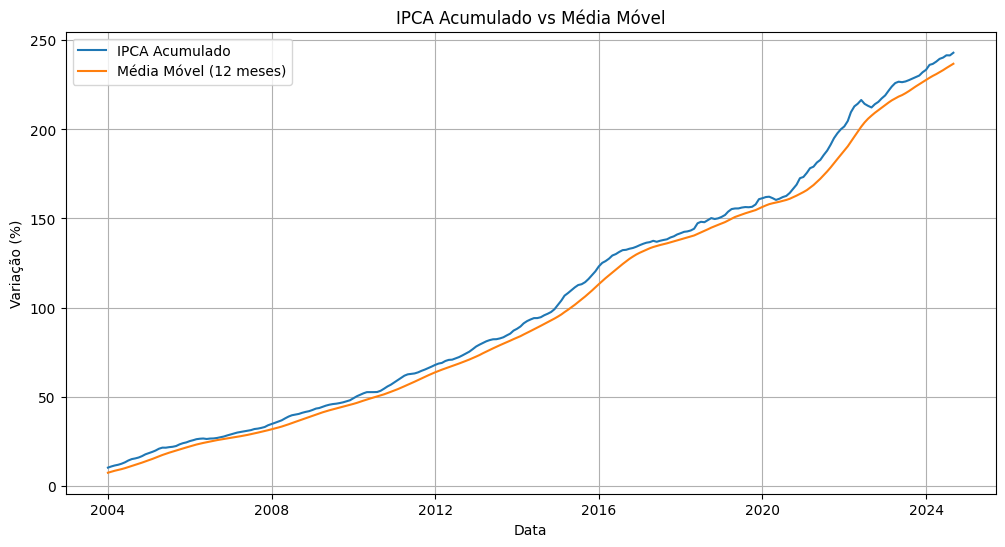

In [8]:
# Verificar as primeiras linhas do dataframe preparado
print(df_prepared.head())

# Visualizar a média móvel de 12 meses em relação ao IPCA acumulado
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_prepared['Date'], df_prepared['IPCA_acum'], label='IPCA Acumulado')
plt.plot(df_prepared['Date'], df_prepared['rolling_mean_12'], label='Média Móvel (12 meses)')
plt.title('IPCA Acumulado vs Média Móvel')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.grid()
plt.show()


In [9]:
# Dividir os dados preparados em treino e teste
train_prepared = df_prepared[df_prepared['Date'] < '2016-09-01']
test_prepared = df_prepared[df_prepared['Date'] >= '2016-09-01']


In [10]:
# Separar features e target
features = [col for col in train_prepared.columns if col.startswith('lag_') or col.startswith('rolling_mean') or col == 'diff_1']
X_train = train_prepared[features]
y_train = train_prepared['IPCA_acum']
X_test = test_prepared[features]
y_test = test_prepared['IPCA_acum']


### Modelo Baseline - ARIMA


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


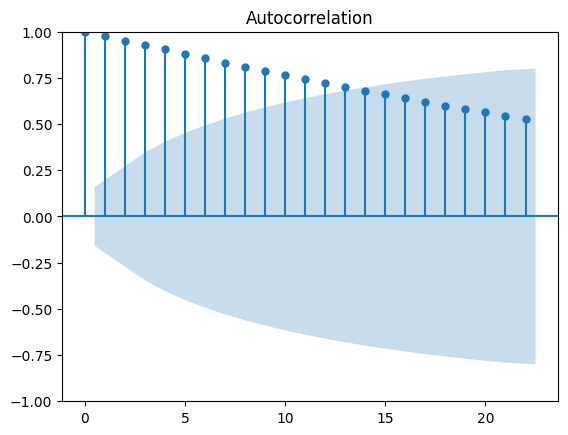

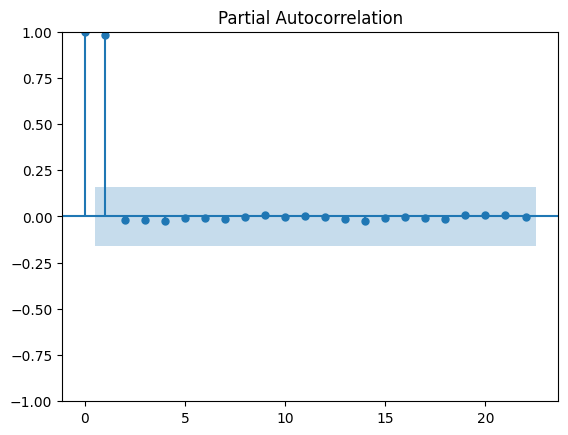

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotar ACF e PACF
plot_acf(train_prepared['IPCA_acum'])
plot_pacf(train_prepared['IPCA_acum'])
plt.show()

In [49]:
from pmdarima import auto_arima

# Busca automática pelos melhores parâmetros
arima_model = auto_arima(train_prepared['IPCA_acum'], 
                         seasonal=True, 
                         m=12,  # Sazonalidade anual
                         stepwise=True, 
                         trace=True)

# Ajustar o modelo ARIMA com os melhores parâmetros encontrados
arima_result = arima_model.fit(train_prepared['IPCA_acum'])

# Prever no conjunto de teste
arima_forecast = arima_result.predict(n_periods=len(test_prepared))

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=107.239, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=129.926, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=127.332, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=123.941, Time=0.08 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=105.590, Time=0.37 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=114.474, Time=0.21 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=107.253, Time=0.99 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=107.359, Time=0.44 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=109.235, Time=1.68 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=103.634, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=112.531, Time=0.15 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=105.267, Time=0.67 sec
 ARIMA(1,2,2)(0,0,2)[12]             : AIC=105.279, Time=0.70 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=105.454, Time=0.35 sec
 ARIMA(1,2,2)(1,0,2)[12]         

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar o modelo ARIMA no conjunto de treino
arima_model = ARIMA(train_prepared['IPCA_acum'], order=(1, 2, 1))
arima_result = arima_model.fit()

# Prever no conjunto de teste
arima_forecast = arima_result.forecast(steps=len(test_prepared))


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar o modelo com os melhores parâmetros
sarimax_model = SARIMAX(
    train_prepared['IPCA_acum'],
    order=(1, 2, 1),
    seasonal_order=(0, 0, 1, 12)
)
sarimax_result = sarimax_model.fit()

# Prever no conjunto de teste
sarimax_forecast = sarimax_result.forecast(steps=len(test_prepared))

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


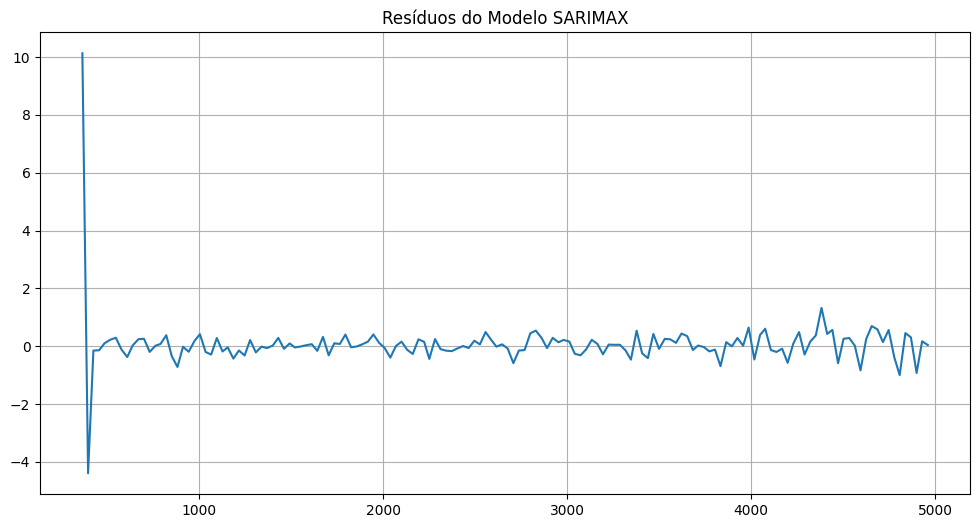

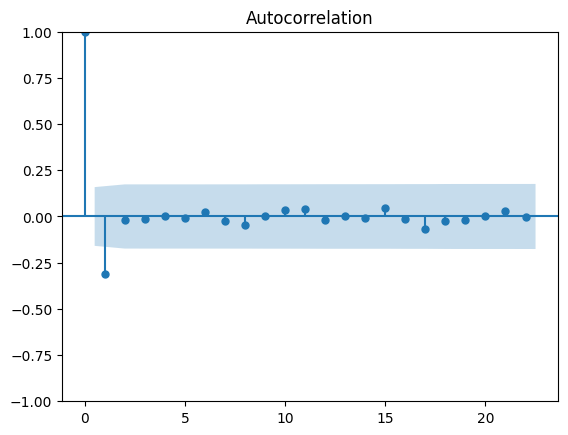

In [56]:
residuals = sarimax_result.resid

# Plotar os resíduos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Resíduos do Modelo SARIMAX')
plt.grid()
plt.show()

# Plotar ACF dos resíduos
plot_acf(residuals)
plt.show()

### Prophet

In [58]:
from prophet import Prophet

# Preparar os dados para Prophet
train_prophet = train_prepared[['Date', 'IPCA_acum']].rename(columns={'Date': 'ds', 'IPCA_acum': 'y'})
test_prophet = test_prepared[['Date', 'IPCA_acum']].rename(columns={'Date': 'ds', 'IPCA_acum': 'y'})

# Ajustar o modelo Prophet
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Fazer previsões
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='M')
forecast = prophet_model.predict(future)

18:11:42 - cmdstanpy - INFO - Chain [1] start processing
18:11:42 - cmdstanpy - INFO - Chain [1] done processing


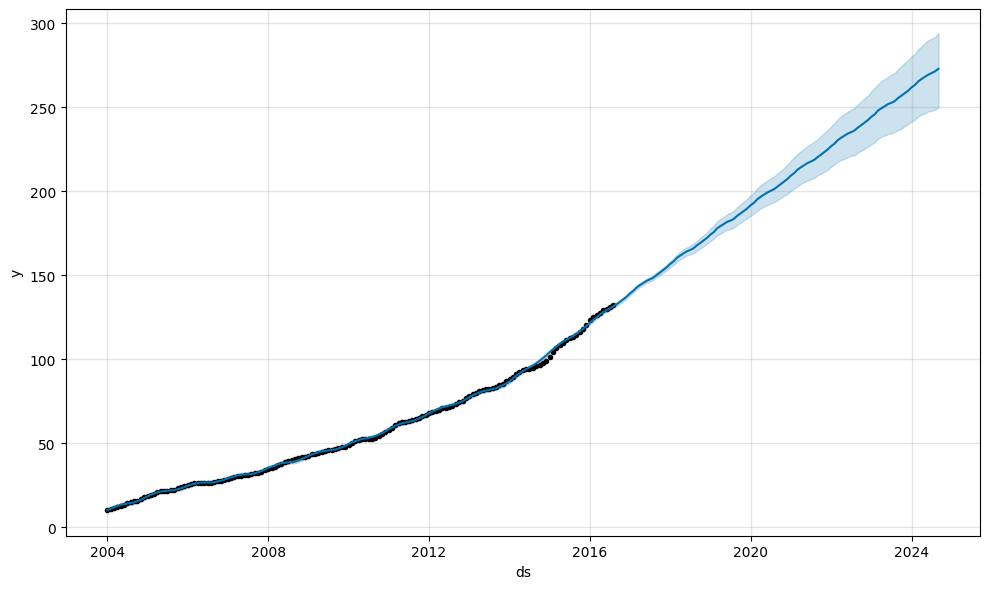

In [61]:
# Visualizar as previsões
fig = prophet_model.plot(forecast)

### Modelos de ML

In [66]:
# Features e target já preparados
features = [col for col in train_prepared.columns if col.startswith('lag_') or col.startswith('rolling_mean') or col == 'diff_1']
X_train = train_prepared[features]
y_train = train_prepared['IPCA_acum']
X_test = test_prepared[features]
y_test = test_prepared['IPCA_acum']

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ajustar o modelo Random Forest com parâmetros iniciais
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
rf_forecast = rf_model.predict(X_test)

# Avaliação
mae_rf = mean_absolute_error(y_test, rf_forecast)
rmse_rf = mean_squared_error(y_test, rf_forecast, squared=False)
print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}")


Random Forest - MAE: 48.3706, RMSE: 60.3708


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
from sklearn.model_selection import GridSearchCV

# Definir o grid de hiperparâmetros
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearch
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = grid_search_rf.best_estimator_
rf_forecast = best_rf_model.predict(X_test)

# Avaliação
mae_rf = mean_absolute_error(y_test, rf_forecast)
rmse_rf = mean_squared_error(y_test, rf_forecast, squared=False)
print(f"Random Forest (Tuned) - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest (Tuned) - MAE: 48.3706, RMSE: 60.3708


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from xgboost import XGBRegressor

# Ajustar o modelo XGBoost com parâmetros iniciais
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Previsões
xgb_forecast = xgb_model.predict(X_test)

# Avaliação
mae_xgb = mean_absolute_error(y_test, xgb_forecast)
rmse_xgb = mean_squared_error(y_test, xgb_forecast, squared=False)
print(f"XGBoost - MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir o grid de hiperparâmetros
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Configurar o RandomizedSearch
random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=50,  # Número de combinações testadas
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42
)
random_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb_model = random_search_xgb.best_estimator_
xgb_forecast = best_xgb_model.predict(X_test)

# Avaliação
mae_xgb = mean_absolute_error(y_test, xgb_forecast)
rmse_xgb = mean_squared_error(y_test, xgb_forecast, squared=False)
print(f"XGBoost (Tuned) - MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}")


In [ ]:
plt.figure(figsize=(12, 6))

# Valores reais
plt.plot(test_prepared['Date'], y_test, label='Valores Reais', color='black', linewidth=2)

# Previsões
plt.plot(test_prepared['Date'], rf_forecast, label='Random Forest', linestyle=':')
plt.plot(test_prepared['Date'], xgb_forecast, label='XGBoost', linestyle='-')

# Personalização do gráfico
plt.title('Previsões: Random Forest e XGBoost')
plt.xlabel('Data')
plt.ylabel('IPCA Acumulado (%)')
plt.legend()
plt.grid()
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reformatar os dados para 3D (necessário para LSTM)
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# Construir a LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Treinar a LSTM
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# Prever no conjunto de teste
lstm_forecast = model_lstm.predict(X_test_lstm).flatten()





Epoch 1/50

5/5 [==============================] - 2s 5ms/step - loss: 4465.6519
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 3422.1636
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 2156.1536
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 1303.9384
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 497.8272
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 88.1521
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 44.8963
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 51.2508
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 32.6686
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 9.8598
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 1.7032
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 2.5783
Epoch 13/50
5/5 [==============================] - 

In [62]:
# Valores reais
y_test = test_prepared['IPCA_acum'].values

# Previsões de cada modelo (você já deve ter rodado estes anteriormente)
arima_forecast = arima_forecast[:len(y_test)]
sarimax_forecast = sarimax_forecast[:len(y_test)]
rf_forecast = rf_forecast[:len(y_test)]
xgb_forecast = xgb_forecast[:len(y_test)]
lstm_forecast = lstm_forecast[:len(y_test)]
prophet_forecast = forecast['yhat'].values[-len(y_test):]

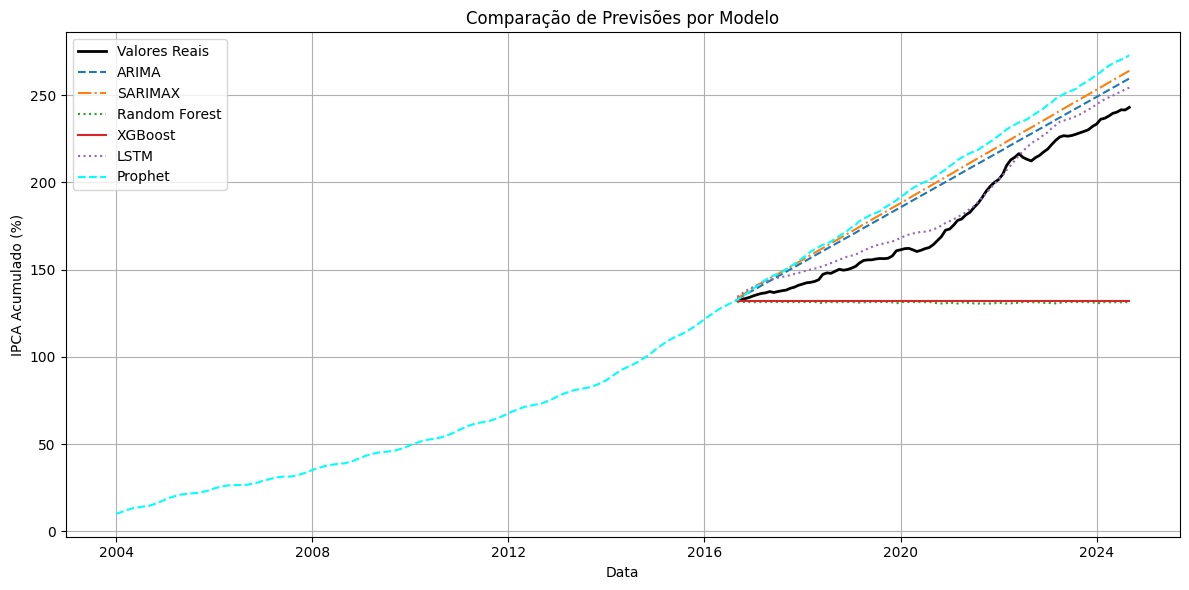

In [65]:
plt.figure(figsize=(12, 6))

# Valores reais
plt.plot(test_prepared['Date'], y_test, label='Valores Reais', color='black', linewidth=2)

# Previsões de outros modelos
plt.plot(test_prepared['Date'], arima_forecast, label='ARIMA', linestyle='--')
plt.plot(test_prepared['Date'], sarimax_forecast, label='SARIMAX', linestyle='-.')
plt.plot(test_prepared['Date'], rf_forecast, label='Random Forest', linestyle=':')
plt.plot(test_prepared['Date'], xgb_forecast, label='XGBoost', linestyle='-')
plt.plot(test_prepared['Date'], lstm_forecast, label='LSTM', linestyle='dotted')

# Previsões do Prophet
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet', linestyle='dashed', color='cyan')

# Personalização do gráfico
plt.title('Comparação de Previsões por Modelo')
plt.xlabel('Data')
plt.ylabel('IPCA Acumulado (%)')
plt.legend()
plt.grid()
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [35]:
import pandas as pd

# Criar um DataFrame unificado para todos os períodos
results_df = pd.DataFrame({
    "Date": df_prepared["Date"],  # Datas completas
    "Real": df_prepared["IPCA_acum"],  # Valores reais
    "ARIMA": pd.concat([train_prepared['IPCA_acum'], pd.Series(arima_forecast, index=test_prepared.index)]),
    "SARIMAX": pd.concat([train_prepared['IPCA_acum'], pd.Series(sarimax_forecast, index=test_prepared.index)]),
    "Random Forest": pd.concat([train_prepared['IPCA_acum'], pd.Series(rf_forecast, index=test_prepared.index)]),
    "XGBoost": pd.concat([train_prepared['IPCA_acum'], pd.Series(xgb_forecast, index=test_prepared.index)]),
    "LSTM": pd.concat([train_prepared['IPCA_acum'], pd.Series(lstm_forecast, index=test_prepared.index)]),
})


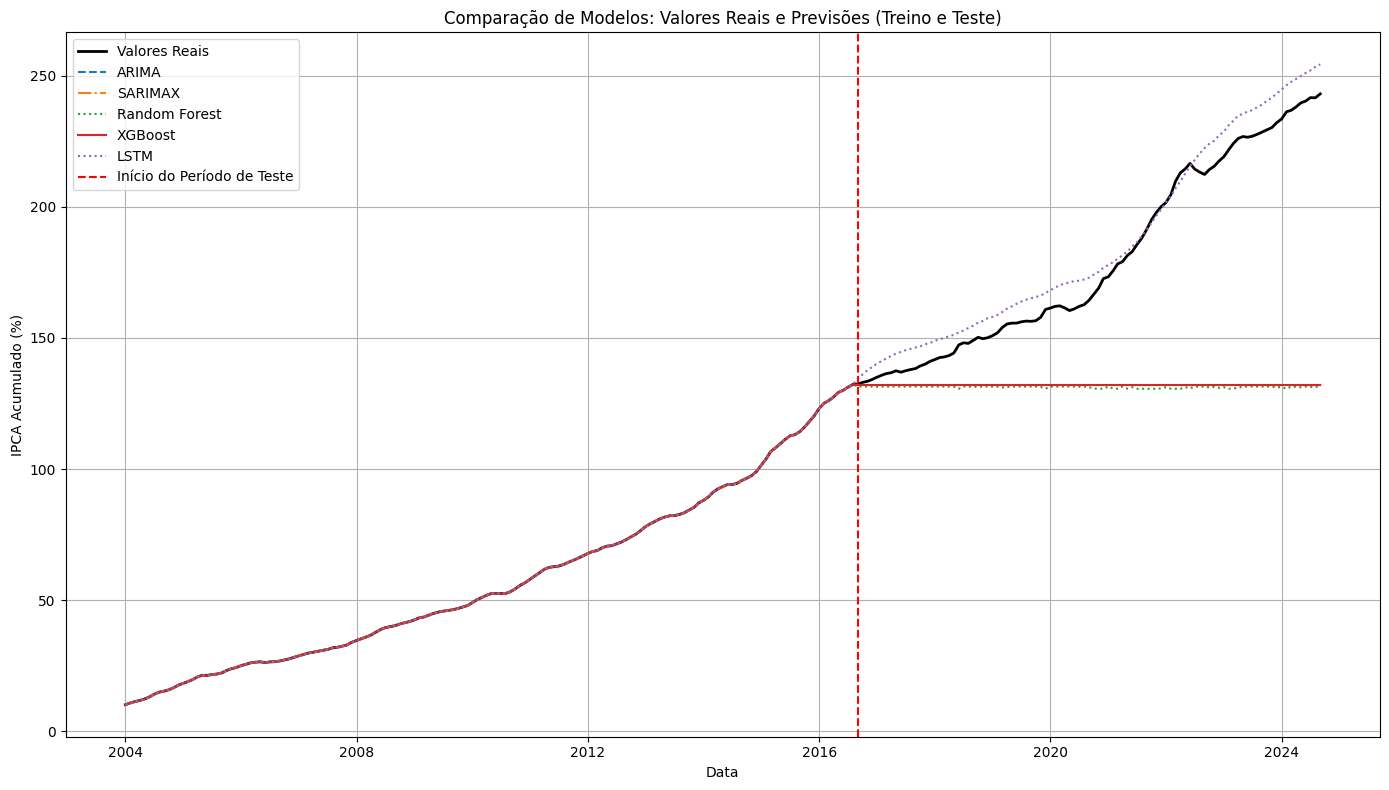

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Valores reais
plt.plot(results_df["Date"], results_df["Real"], label='Valores Reais', color='black', linewidth=2)

# Previsões de cada modelo
plt.plot(results_df["Date"], results_df["ARIMA"], label='ARIMA', linestyle='--')
plt.plot(results_df["Date"], results_df["SARIMAX"], label='SARIMAX', linestyle='-.')
plt.plot(results_df["Date"], results_df["Random Forest"], label='Random Forest', linestyle=':')
plt.plot(results_df["Date"], results_df["XGBoost"], label='XGBoost', linestyle='-')
plt.plot(results_df["Date"], results_df["LSTM"], label='LSTM', linestyle='dotted')

# Linha vertical para marcar o início do período de teste
plt.axvline(x=pd.Timestamp('2016-09-01'), color='red', linestyle='--', label='Início do Período de Teste')

# Personalização
plt.title('Comparação de Modelos: Valores Reais e Previsões (Treino e Teste)')
plt.xlabel('Data')
plt.ylabel('IPCA Acumulado (%)')
plt.legend()
plt.grid()
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [37]:
from prophet import Prophet

# Preparar os dados para Prophet
train_prophet = train_prepared[['Date', 'IPCA_acum']].rename(columns={'Date': 'ds', 'IPCA_acum': 'y'})
test_prophet = test_prepared[['Date', 'IPCA_acum']].rename(columns={'Date': 'ds', 'IPCA_acum': 'y'})

# Ajustar o modelo Prophet
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Fazer previsões
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='M')
forecast = prophet_model.predict(future)


17:46:45 - cmdstanpy - INFO - Chain [1] start processing
17:46:45 - cmdstanpy - INFO - Chain [1] done processing


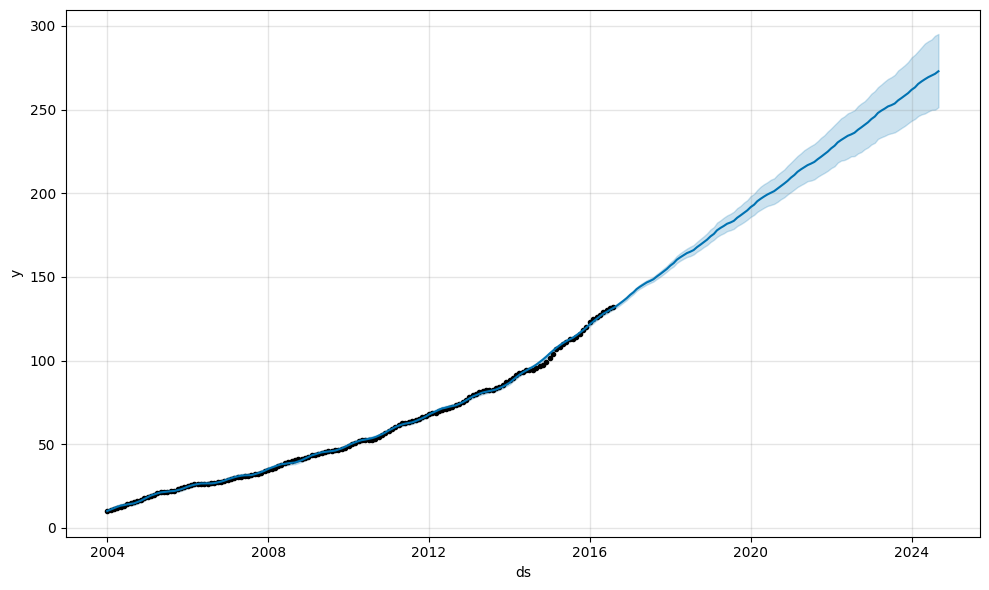

In [38]:
# Visualizar as previsões
fig = prophet_model.plot(forecast)


In [40]:
from prophet import Prophet

# Ajustar o modelo Prophet com sazonalidade anual
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train_prophet)


17:49:52 - cmdstanpy - INFO - Chain [1] start processing
17:49:52 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
# Calcular a diferença média entre as previsões e os valores reais no período de treino
level_offset = train_prophet['y'].mean() - forecast['yhat'][:len(train_prophet)].mean()

# Ajustar as previsões para o nível correto
forecast['yhat_adjusted'] = forecast['yhat'] + level_offset


In [44]:
train_prophet['cap'] = 200  # Estabelecendo um teto para o IPCA acumulado
prophet_model = Prophet(growth='logistic')
prophet_model.fit(train_prophet)


17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:01 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# Expandir previsões do Prophet para todo o período
prophet_forecast_full = pd.Series(index=results_df["Date"], dtype='float64')
prophet_forecast_full[:len(train_prophet)] = train_prophet['y'].values  # Usar valores reais no treino
prophet_forecast_full[len(train_prophet):] = prophet_forecast_adjusted  # Previsões ajustadas no teste


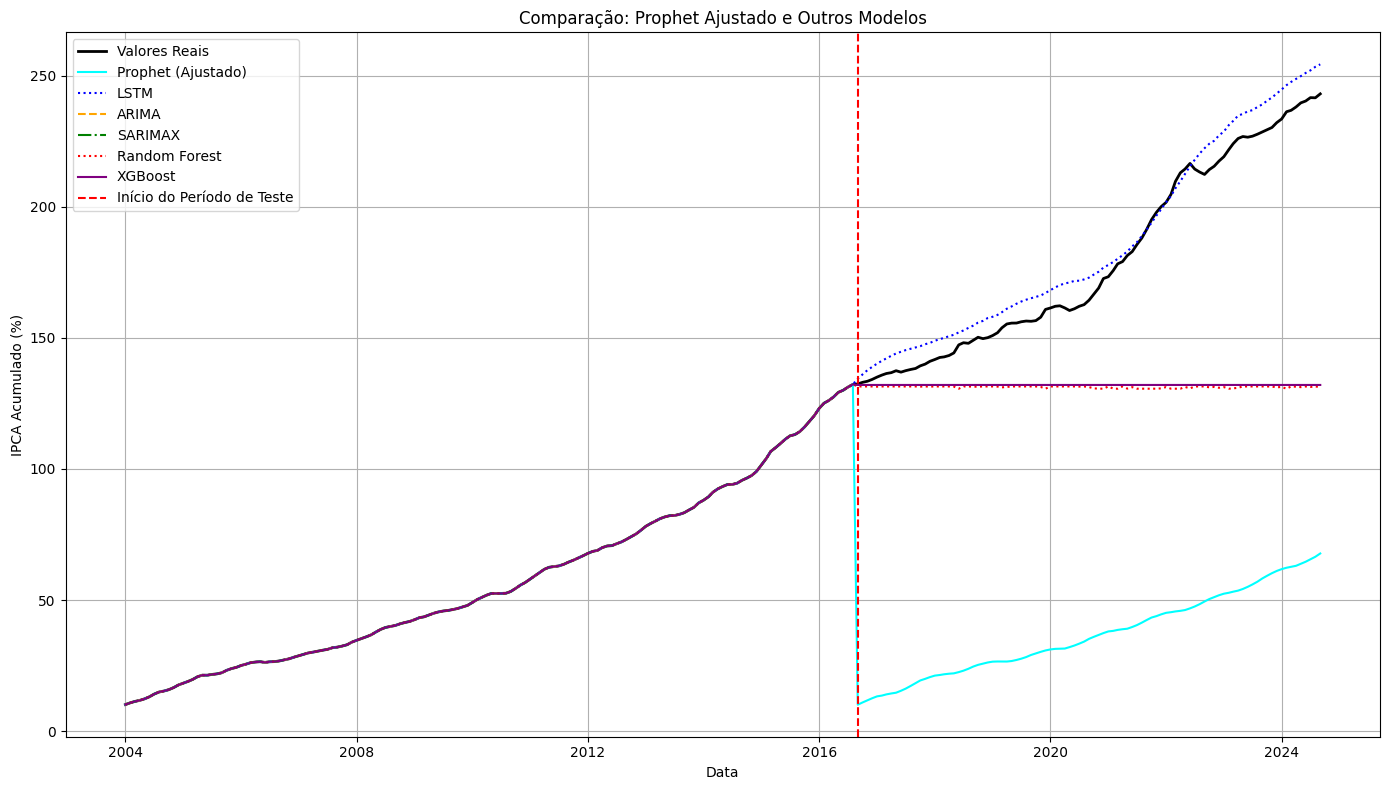

In [48]:
plt.figure(figsize=(14, 8))

# Valores reais
plt.plot(results_df["Date"], results_df["Real"], label='Valores Reais', color='black', linewidth=2)

# Previsões do Prophet ajustadas
plt.plot(results_df["Date"], prophet_forecast_full, label='Prophet (Ajustado)', linestyle='-', color='cyan')

# Outras previsões (opcional)
plt.plot(results_df["Date"], results_df["LSTM"], label='LSTM', linestyle='dotted', color='blue')
plt.plot(results_df["Date"], results_df["ARIMA"], label='ARIMA', linestyle='--', color='orange')
plt.plot(results_df["Date"], results_df["SARIMAX"], label='SARIMAX', linestyle='-.', color='green')
plt.plot(results_df["Date"], results_df["Random Forest"], label='Random Forest', linestyle=':', color='red')
plt.plot(results_df["Date"], results_df["XGBoost"], label='XGBoost', linestyle='-', color='purple')

# Destacar início do período de teste
plt.axvline(x=pd.Timestamp('2016-09-01'), color='red', linestyle='--', label='Início do Período de Teste')

# Personalização do gráfico
plt.title('Comparação: Prophet Ajustado e Outros Modelos')
plt.xlabel('Data')
plt.ylabel('IPCA Acumulado (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


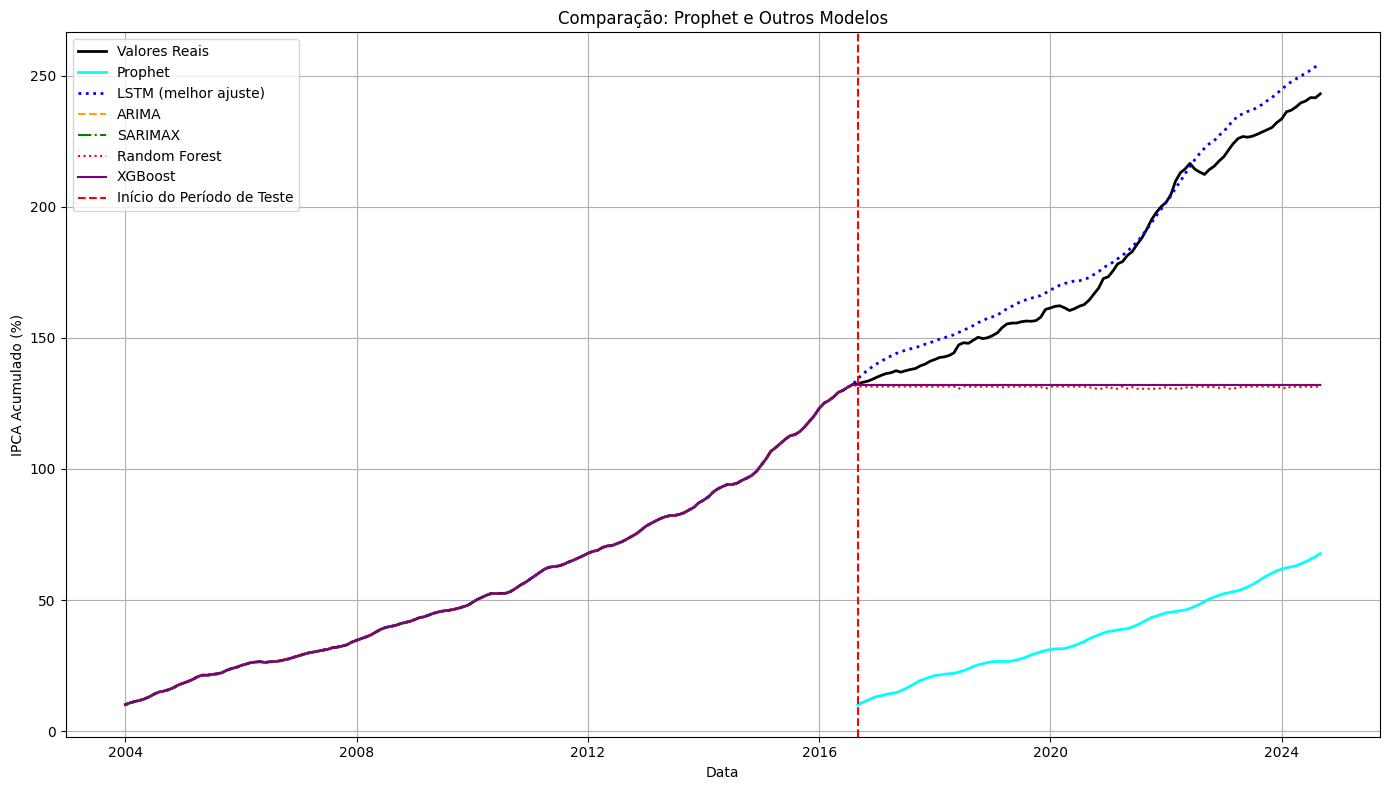

In [43]:
# Extrair previsões do Prophet
prophet_forecast = forecast['yhat'][:len(test_prepared)].values

# Adicionar ao gráfico comparativo
plt.figure(figsize=(14, 8))

# Valores reais
plt.plot(results_df["Date"], results_df["Real"], label='Valores Reais', color='black', linewidth=2)

# Adicionar previsões do Prophet
plt.plot(test_prepared['Date'], prophet_forecast, label='Prophet', linestyle='-', color='cyan', linewidth=2)

# Outras previsões
plt.plot(results_df["Date"], results_df["LSTM"], label='LSTM (melhor ajuste)', linestyle='dotted', color='blue', linewidth=2)
plt.plot(results_df["Date"], results_df["ARIMA"], label='ARIMA', linestyle='--', color='orange')
plt.plot(results_df["Date"], results_df["SARIMAX"], label='SARIMAX', linestyle='-.', color='green')
plt.plot(results_df["Date"], results_df["Random Forest"], label='Random Forest', linestyle=':', color='red')
plt.plot(results_df["Date"], results_df["XGBoost"], label='XGBoost', linestyle='-', color='purple')

# Destacar o início do período de teste
plt.axvline(x=pd.Timestamp('2016-09-01'), color='red', linestyle='--', label='Início do Período de Teste')

# Personalização
plt.title('Comparação: Prophet e Outros Modelos')
plt.xlabel('Data')
plt.ylabel('IPCA Acumulado (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Filtrar dados de treinamento (até outubro de 2022) e teste (após outubro de 2022)
train = df[df['Date'] <= pd.Timestamp('2022-10-01')]
test = df[df['Date'] > pd.Timestamp('2022-09-01')]

# Variáveis independentes e dependente
X_train = train[['Selic', 'IBC_Br']]  # Adicione mais variáveis explicativas, se necessário
y_train = train['IPCA_acum']
X_test = test[['Selic', 'IBC_Br']]
y_test = test['IPCA_acum']

In [53]:
from sklearn.preprocessing import StandardScaler

# Padronizar os dados (necessário para alguns modelos como SVR e Redes Neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Lista de modelos para avaliar
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000),
}

# Avaliar modelos
results = {}

for name, model in models.items():
    # Treinar o modelo
    if name in ["SVR", "Neural Network"]:
        model.fit(X_train_scaled, y_train)  # Modelos que requerem dados escalados
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Avaliar o desempenho
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae}

    print(f"{name}: RMSE = {rmse:.4f}, MAE = {mae:.4f}")


Linear Regression: RMSE = 117.4250, MAE = 117.3617
Ridge: RMSE = 117.4179, MAE = 117.3547
Lasso: RMSE = 117.1897, MAE = 117.1275
ElasticNet: RMSE = 116.5149, MAE = 116.4543
SVR: RMSE = 153.1391, MAE = 152.9186
KNN: RMSE = 111.8830, MAE = 100.2350
Random Forest: RMSE = 95.2354, MAE = 72.5196
Gradient Boosting: RMSE = 95.4883, MAE = 74.1977
XGBoost: RMSE = 94.1786, MAE = 66.9254
Neural Network: RMSE = 111.6824, MAE = 111.5825


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Os resultados indicam que o XGBoost foi o modelo com melhor desempenho, apresentando o menor erro (RMSE = 94.1786, MAE = 66.9254), seguido de perto pelo Random Forest (RMSE = 95.2354, MAE = 72.5196) e pelo Gradient Boosting (RMSE = 95.4883, MAE = 74.1977). Esses modelos são bastante robustos e normalmente têm bom desempenho em problemas de regressão.

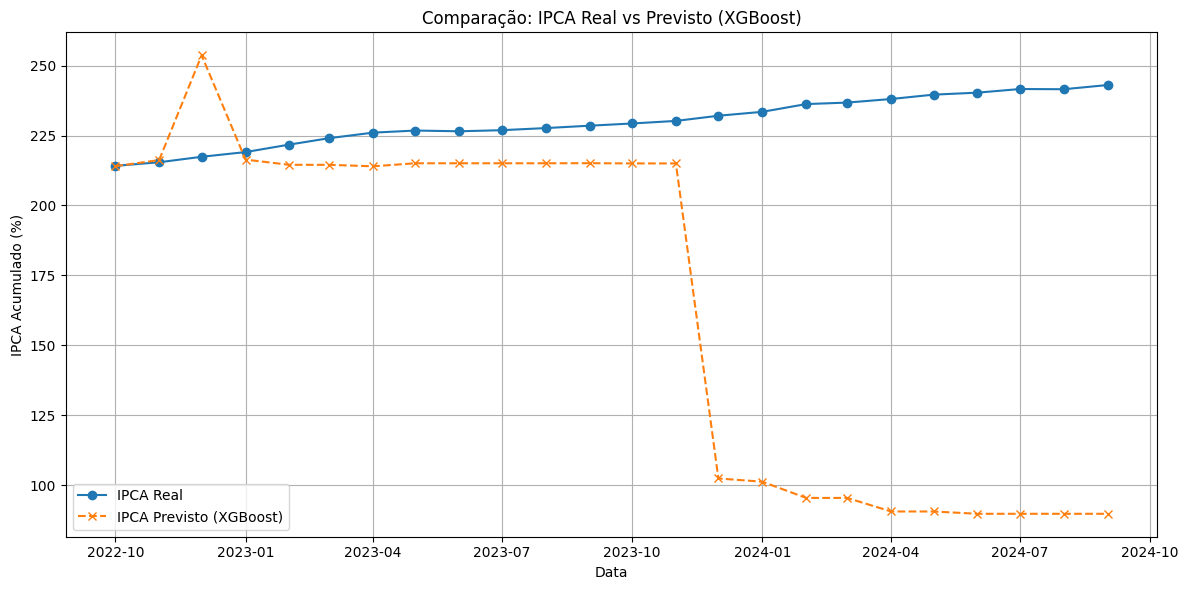

In [57]:
# Selecionar o melhor modelo (XGBoost)
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test)

# Comparar os valores reais e previstos
comparison = test[['Date', 'IPCA_acum']].copy()
comparison['IPCA_pred'] = y_pred

# Plotar o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison['Date'], comparison['IPCA_acum'], label='IPCA Real', marker='o')
plt.plot(comparison['Date'], comparison['IPCA_pred'], label='IPCA Previsto (XGBoost)', linestyle='--', marker='x')
plt.title('Comparação: IPCA Real vs Previsto (XGBoost)')
plt.ylabel('IPCA Acumulado (%)')
plt.xlabel('Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


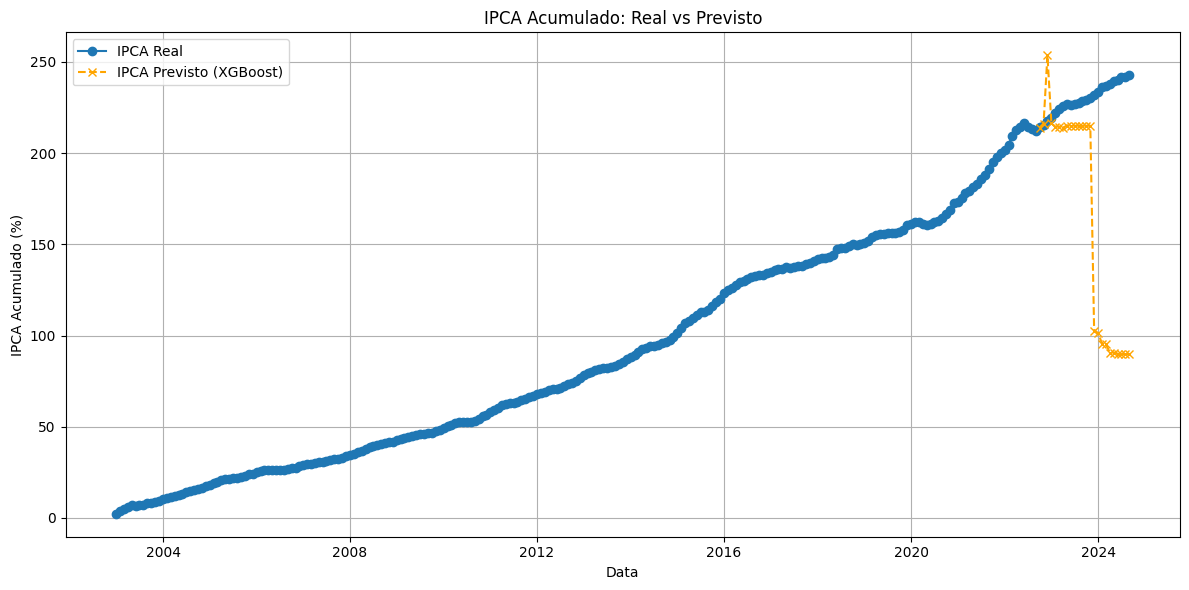

In [59]:
# Combinar os dados reais e previstos
full_comparison = df[['Date', 'IPCA_acum']].copy()
full_comparison['IPCA_pred'] = np.nan  # Inicializar com NaN para evitar erros

# Preencher os valores previstos apenas no período de teste
test_dates = test['Date'].values  # Datas do conjunto de teste
full_comparison.loc[full_comparison['Date'].isin(test_dates), 'IPCA_pred'] = y_pred

# Plotar o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotar o IPCA acumulado (real)
plt.plot(full_comparison['Date'], full_comparison['IPCA_acum'], label='IPCA Real', marker='o')

# Plotar os valores previstos apenas no período de teste
plt.plot(full_comparison['Date'], full_comparison['IPCA_pred'], label='IPCA Previsto (XGBoost)', linestyle='--', marker='x', color='orange')

# Detalhes do gráfico
plt.title('IPCA Acumulado: Real vs Previsto')
plt.ylabel('IPCA Acumulado (%)')
plt.xlabel('Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## 